In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from datetime import datetime

import warnings

warnings.filterwarnings('ignore')

In [3]:

# Load the dataset
df = pd.read_csv('../data/melb_data.csv')

# Display the first few rows
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Data Exploration and Preperation

In [4]:

# Basic statistics
df.describe()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [5]:

# Check for missing values
df.isnull().sum()


Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [6]:
df['Type'].unique()

array(['h', 'u', 't'], dtype=object)

## Extracting Year, Month, Day of the week

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [8]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [9]:
df['YearBuilt'].fillna(df['Year'] - 150, inplace=True)

In [10]:
df['BuildingArea'].fillna(0, inplace=True)

In [11]:
df['Car'].fillna(0, inplace=True)

In [12]:
df['AgeAtSale'] = df['Year'] - df['YearBuilt']

In [13]:
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month,DayOfWeek,AgeAtSale
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,1866.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,2016,12,5,150.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,2016,2,3,116.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,2017,3,5,117.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,...,1867.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,2017,3,5,150.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,...,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,2016,6,5,2.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,2016-05-07,2.5,3067.0,...,1866.0,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0,2016,5,5,150.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-05-07,2.5,3067.0,...,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0,2016,5,5,106.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-10-08,2.5,3067.0,...,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0,2016,10,5,126.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,2016-10-08,2.5,3067.0,...,1866.0,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0,2016,10,5,150.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,2016-10-08,2.5,3067.0,...,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0,2016,10,5,116.0


In [14]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
Year                0
Month               0
DayOfWeek           0
AgeAtSale           0
dtype: int64

### Histograms of Numerical Features

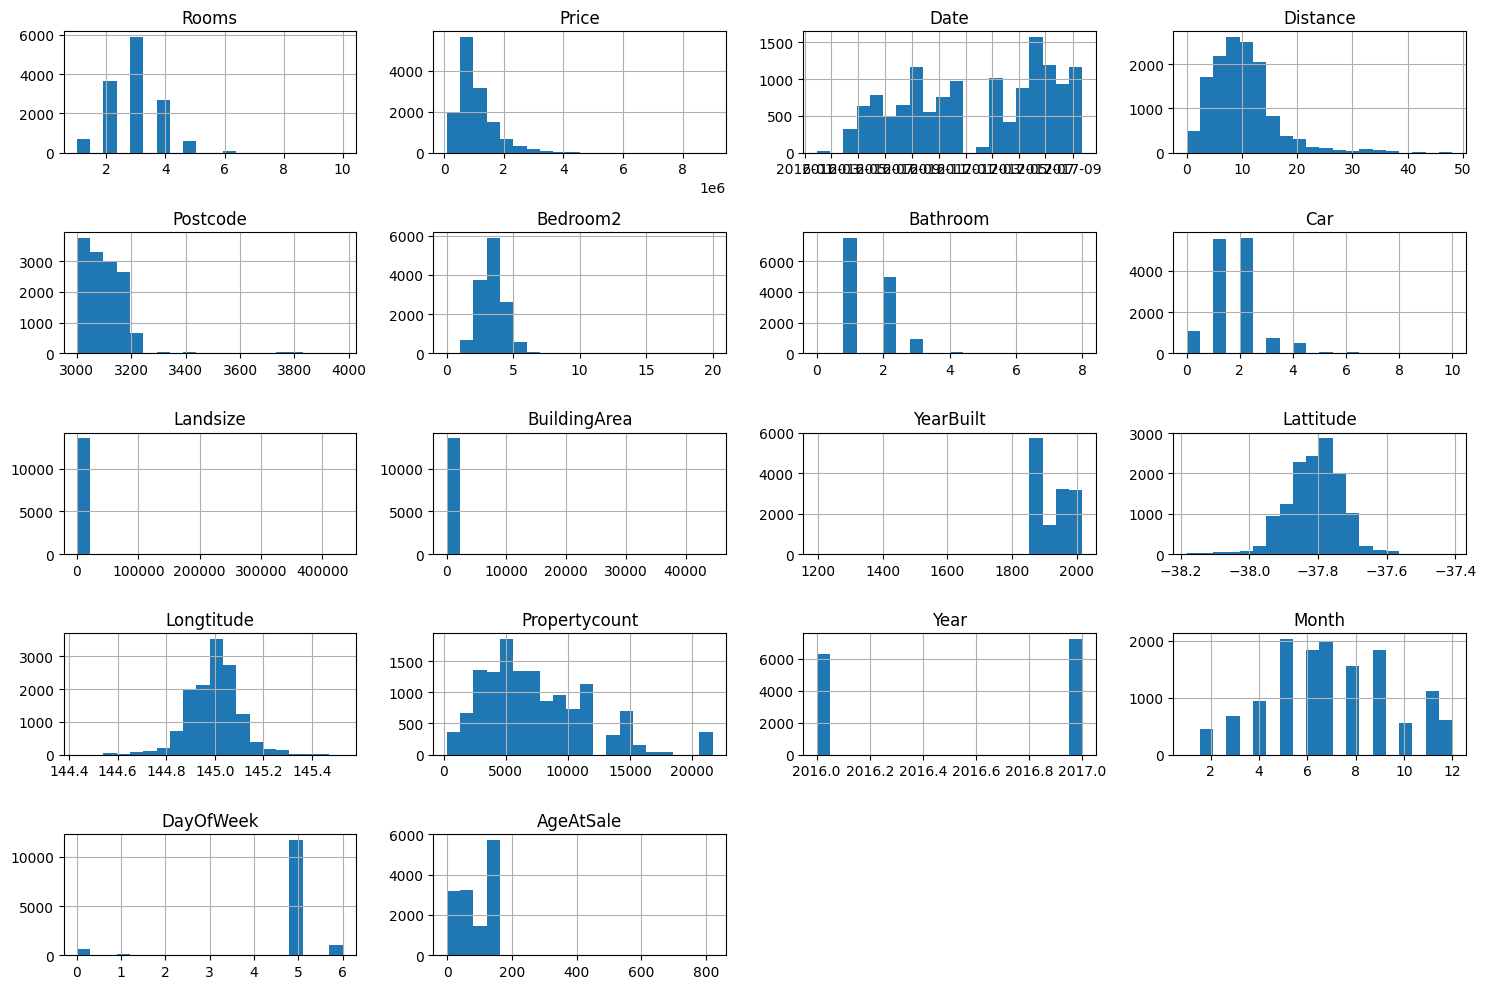

In [15]:

# Plot histograms for numerical features
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()


## Encoding Property Type

In [16]:
type_encoded = pd.get_dummies(df['Type'], prefix='Type')

# Concatenate the encoded columns with the original dataframe
df = pd.concat([df, type_encoded], axis=1)

### Correlation Matrix

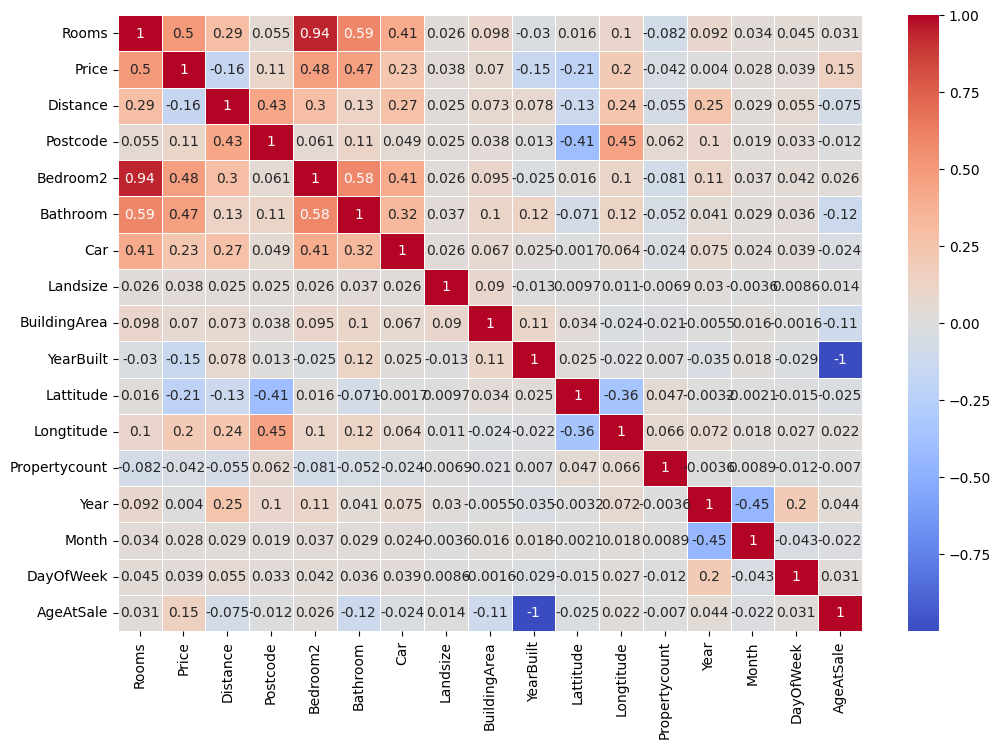

In [17]:
corrmat = df.select_dtypes(np.number).corr()
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


### Boxplot of Property Price

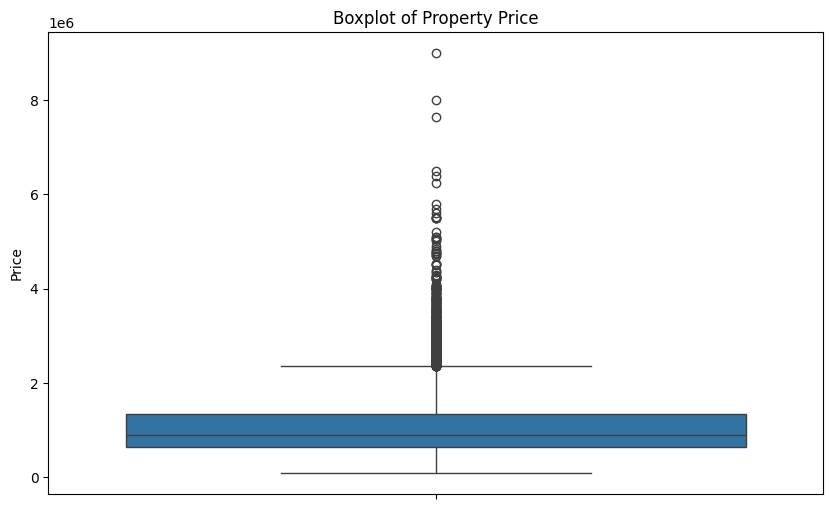

In [18]:

# Boxplot of Price to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Price'])
plt.title('Boxplot of Property Price')
plt.show()


## Removing outliers

In [19]:
mask = df['Price'] < 4_000_000

df_cleaned = df[mask].reset_index(drop=True)

In [20]:
df_cleaned.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Longtitude,Regionname,Propertycount,Year,Month,DayOfWeek,AgeAtSale,Type_h,Type_t,Type_u
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,144.9984,Northern Metropolitan,4019.0,2016,12,5,150.0,True,False,False
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,144.9934,Northern Metropolitan,4019.0,2016,2,3,116.0,True,False,False
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,144.9944,Northern Metropolitan,4019.0,2017,3,5,117.0,True,False,False
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,...,144.9969,Northern Metropolitan,4019.0,2017,3,5,150.0,True,False,False
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,...,144.9941,Northern Metropolitan,4019.0,2016,6,5,2.0,True,False,False


In [21]:
df_cleaned.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Year', 'Month',
       'DayOfWeek', 'AgeAtSale', 'Type_h', 'Type_t', 'Type_u'],
      dtype='object')

## Data Preprocessing

In [22]:
feats = [
    'Rooms', 'Distance', 'Bathroom', 'Car',
    'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
    'Longtitude', 'Year', 'Month',
    'DayOfWeek', 'AgeAtSale', 'Type_h', 'Type_t', 'Type_u'
]
label = 'Price'

# Select features and target
X = df_cleaned[feats]
y = df_cleaned['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Linear Regression Model

In [23]:
def plot_45_degree_comparison(y_test, y_pred, title='Train vs Predict Comparison'):
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, y_pred, alpha=0.5, edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.grid(True)
    plt.axis('equal')
    plt.show()

In [24]:
def plot_feature_importance(model, feature_names, title='Feature Importance'):
    # Determine if the model has feature importances (tree-based) or coefficients (linear model)
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importance = np.abs(model.coef_)  # Take the absolute value of coefficients for comparison
    else:
        raise ValueError("The provided model does not have feature importances or coefficients.")

    # Sort the feature importance in descending order
    indices = np.argsort(importance)[::-1]
    sorted_features = [feature_names[i] for i in indices]

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features, importance[indices], color='skyblue')
    plt.xlabel('Importance Score')
    plt.title(title)
    plt.gca().invert_yaxis()  # To display the most important feature at the top
    plt.grid(True)
    plt.show()

In [25]:

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression Model - Mean Squared Error: {mse_linear:.2f}")
print(f"Linear Regression Model - R^2 Score: {r2_linear:.2f}")


Linear Regression Model - Mean Squared Error: 146747566568.14
Linear Regression Model - R^2 Score: 0.58


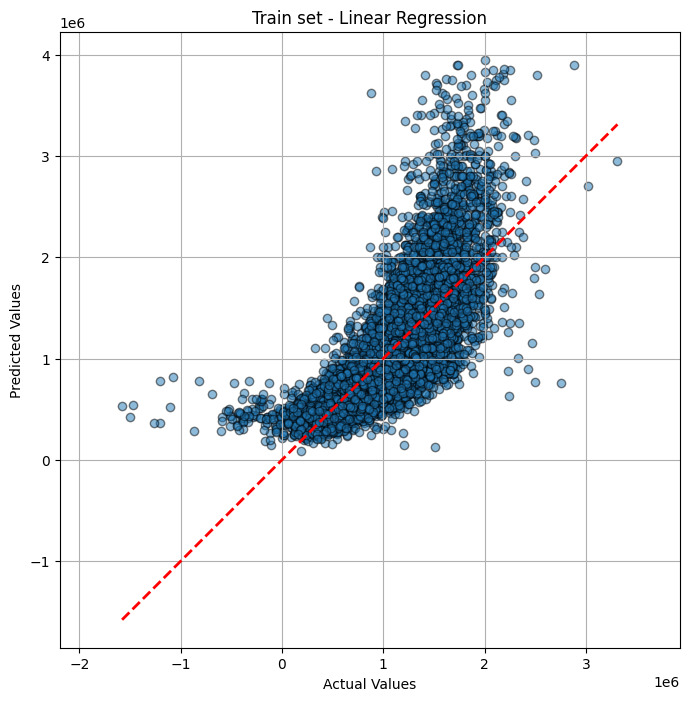

In [26]:
plot_45_degree_comparison(linear_model.predict(X_train), y_train, title="Train set - Linear Regression")

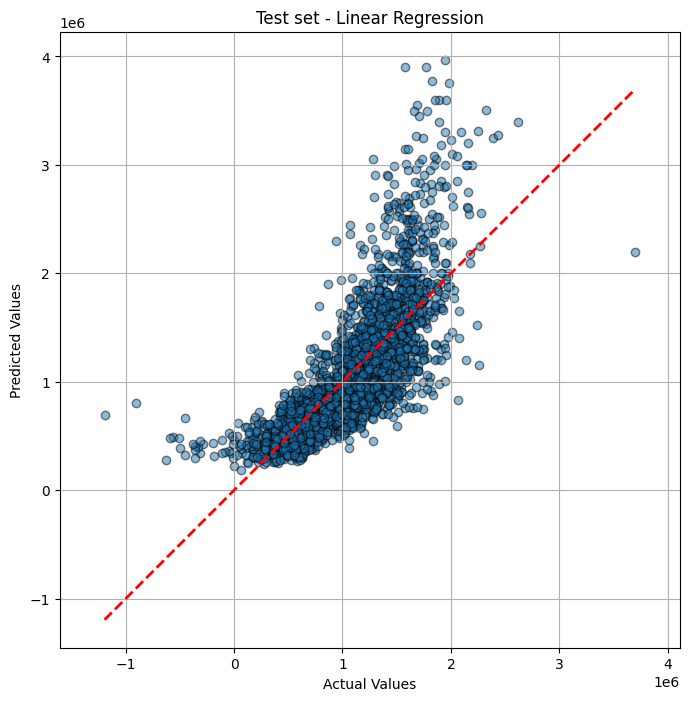

In [27]:
plot_45_degree_comparison(linear_model.predict(X_test), y_test, title="Test set - Linear Regression")

## Random Forest Regressor Model

In [28]:

# Train RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor Model - Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest Regressor Model - R^2 Score: {r2_rf:.2f}")


Random Forest Regressor Model - Mean Squared Error: 58699450288.34
Random Forest Regressor Model - R^2 Score: 0.83


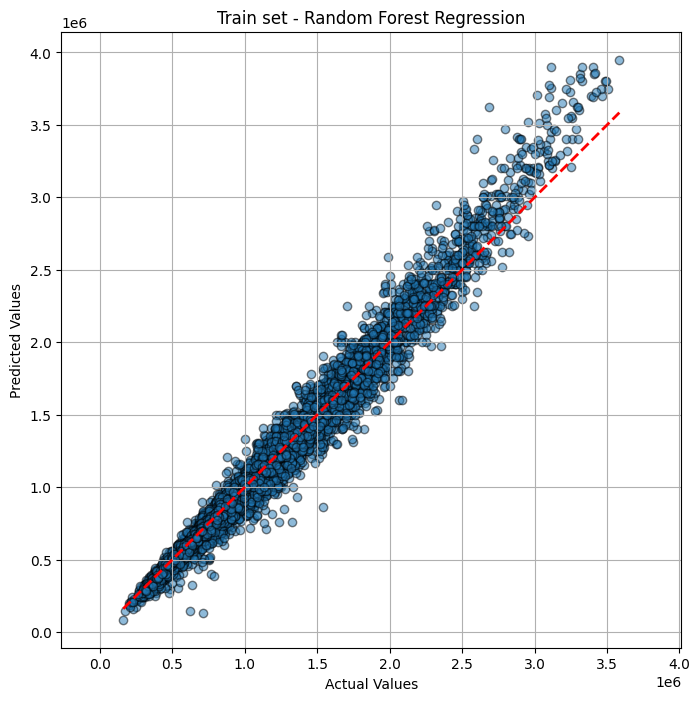

In [29]:
plot_45_degree_comparison(rf_model.predict(X_train), y_train, title="Train set - Random Forest Regression")

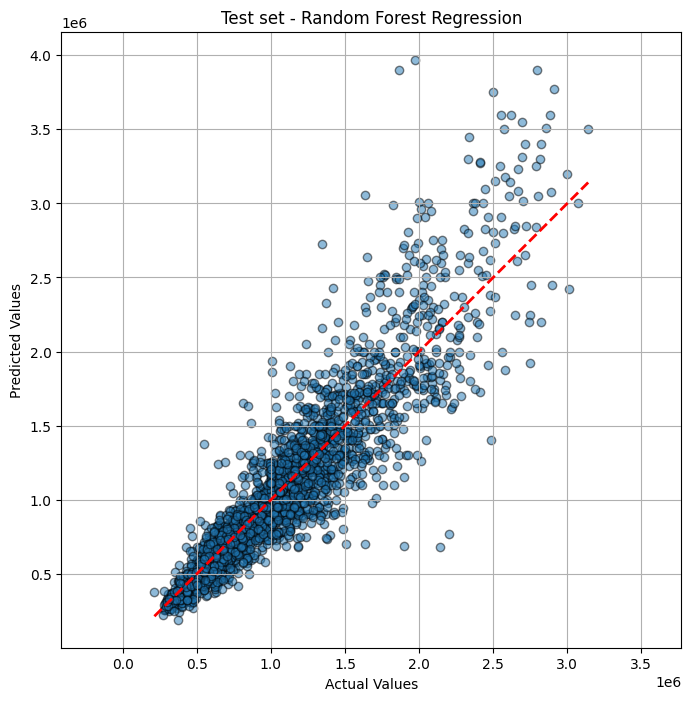

In [30]:
plot_45_degree_comparison(rf_model.predict(X_test), y_test, title="Test set - Random Forest Regression")

# Feature Importance

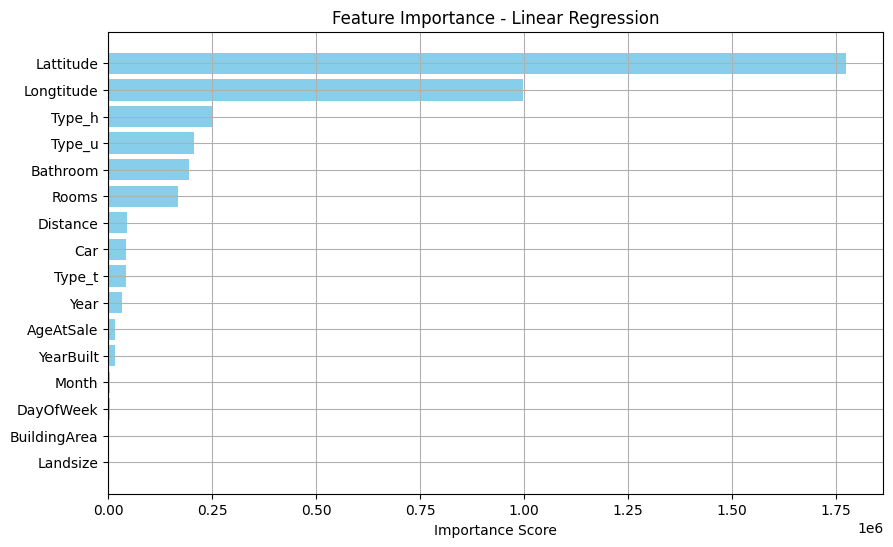

In [31]:
plot_feature_importance(linear_model, feats, title='Feature Importance - Linear Regression')

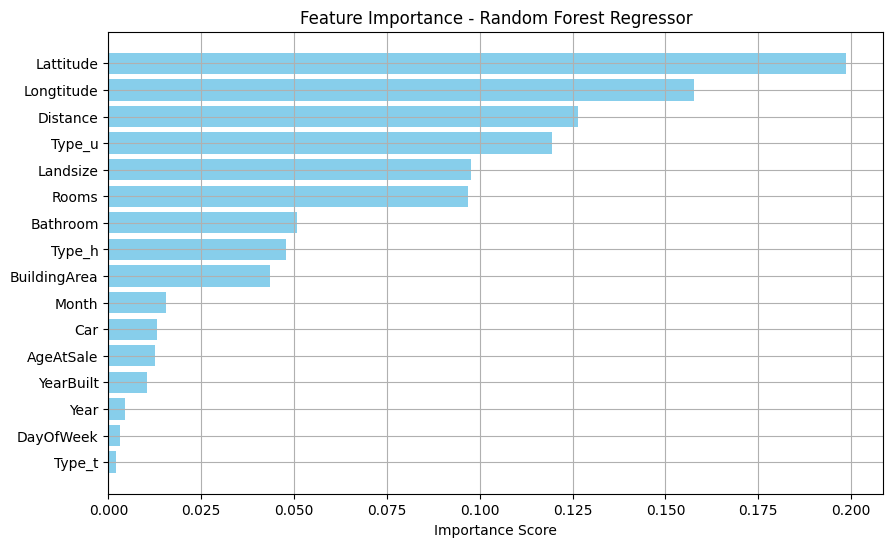

In [32]:
plot_feature_importance(rf_model, feats, title='Feature Importance - Random Forest Regressor')

In [33]:
# import plotly.express as px
# fig = px.scatter_mapbox(
#     df_cleaned,
#     lat='Lattitude',
#     lon='Longtitude',
#     color='Price',
#     hover_data=['Price', 'Landsize'],
#     # text='Address',  # Labels to display on the map
#     zoom=8,
#     height=500
# )

# # Set mapbox style
# fig.update_layout(mapbox_style="open-street-map")

# # Show the map
# fig.show()

## Save the model

In [34]:
import pickle

# Save the model to a file
with open('rf_trained_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

## Load the model

In [35]:
with open('rf_trained_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)